In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-longevity-factors/LiveLongerData.csv


In [2]:
import pandas as pd

# Load the dataset
data_file_path = ('/kaggle/input/life-longevity-factors/LiveLongerData.csv')
data = pd.read_csv(data_file_path)

# Display the first few rows of the dataset
data.head()


,Factor,Years gained / lost,strength of science?,strength of science as a number,sexes affected,effect,Comment,Note,ID,Sources,Links
0,Smoking,-10.0,strong,3,Both,negative,10 years gained (against those who continue to...,14 if combined with exercise and eating health...,1,"Khaw KT, et al. (2008). Combined impact of hea...",http://www.washingtonpost.com/wp-dyn/articles/...
1,Sitting Down,-3.0,suggestive,1,Both,negative,for 8-11 hours sitting a day,"No matter how much you exercise, sitting too m...",2,Sydney School of Public Health research paper ...,http://www.ncbi.nlm.nih.gov/pubmed/22450936
2,Too much sleeping,-1.5,suggestive,1,Both,negative,"7 hours ideal, no more than 8 hrs a night",Averaging more than 8 hours sleep a night will...,3,New Scientist,http://www.newscientist.com/article/dn1928-sev...
3,More Optimism,2.0,suggestive,1,Female,positive,& faith in fellow humans. calc takes average %...,Women within the highest 25% of optimism score...,4,"Source: Hilary A. Tindle, M.D., assistant prof...",www.nlm.nih.gov/medlineplus/news/fullstory_879...
4,More Pets,3.0,good,2,Both,positive,particularly for elderly. calc assumes that he...,(1) Cats - According to a study by the Minneso...,5,Medical News Today; National Center for Biotec...,http://www.medicalnewstoday.com/articles/98432...


In [3]:
# Filter the dataset to only include rows where the effect is positive
positive_effect_data = data[data['effect'] == 'positive']

# Sort the results by the 'Years gained / lost' column in descending order
positive_effect_data_sorted = positive_effect_data.sort_values(by='Years gained / lost', ascending=False)

positive_effect_data_sorted[['Factor', 'Years gained / lost', 'strength of science?', 'sexes affected']]


,Factor,Years gained / lost,strength of science?,sexes affected
19,Spending more time with women,15.00,suggestive,male
20,Avoid Cancer,15.00,suggestive,Both
18,"a lifestyle of non-smoking, exercising, and he...",14.00,strong,Both
17,Avoid heart disease,13.00,suggestive,Both
16,More Meditation,12.00,suggestive,Both
15,Less Food,11.67,suggestive,Both
14,Good marriage,10.00,good,Both
31,Polygamy,9.30,suggestive,Male
30,Country living,8.00,suggestive,Both
26,More Money,7.50,good,Both


In [4]:
import plotly.express as px

# Select the top 10 factors that increase lifespan
top_factors = positive_effect_data_sorted.head(10)

# Create the bar chart
fig_bar = px.bar(
    top_factors,
    x='Years gained / lost',
    y='Factor',
    title='Top 10 Factors that Increase Lifespan',
    labels={'Years gained / lost': 'Years Gained', 'Factor': 'Factor'},
    orientation='h',
    color='strength of science?'
)

# Show the figure
fig_bar.show()


In [5]:
# Create the pie chart
fig_pie = px.pie(
    positive_effect_data_sorted,
    names='Factor',
    values='Years gained / lost',
    color='strength of science?',
    title='Distribution of Factors that Increase Lifespan by Strength of Science',
    hole=0.3
)

# Show the figure
fig_pie.show()


In [6]:
# Create the bubble chart using absolute values for the size
fig_bubble = px.scatter(
    positive_effect_data_sorted,
    x='Factor',
    y='sexes affected',
    size=abs(positive_effect_data_sorted['Years gained / lost']),
    color='strength of science?',
    title='Factors that Increase Lifespan',
    labels={'Years gained / lost': 'Years Gained', 'Factor': 'Factor', 'sexes affected': 'Sexes Affected'},
    size_max=60,
    template='plotly',
)

# Customize the figure
fig_bubble.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig_bubble.update_layout(showlegend=True, height=600, width=1000)

# Show the figure
fig_bubble.show()


In [7]:
# Create the horizontal bar chart
fig_hbar = px.bar(
    positive_effect_data_sorted,
    x='Years gained / lost',
    y='sexes affected',
    color='strength of science?',
    title='Distribution of Factors that Increase Lifespan by Sexes Affected',
    labels={'Years gained / lost': 'Years Gained', 'sexes affected': 'Sexes Affected'},
    orientation='h',
    height=400
)

# Customize the figure
fig_hbar.update_layout(showlegend=True)

# Show the figure
fig_hbar.show()


In [8]:
# Count the number of factors affecting each sex
sex_count = positive_effect_data_sorted['sexes affected'].value_counts()

# Update the figure with text annotations
fig_hbar.update_layout(
    annotations=[
        dict(
            x=sex_count['Both'],
            y=0,
            xref="x",
            yref="y",
            text=f"{sex_count['Both']} Factors",
            showarrow=False,
            font=dict(size=16, color="black"),
        ),
        dict(
            x=sex_count['Male'],
            y=1,
            xref="x",
            yref="y",
            text=f"{sex_count['Male']} Factors",
            showarrow=False,
            font=dict(size=16, color="black"),
        ),
        dict(
            x=sex_count['Female'],
            y=2,
            xref="x",
            yref="y",
            text=f"{sex_count['Female']} Factors",
            showarrow=False,
            font=dict(size=16, color="black"),
        ),
        dict(
            x=sex_count['Both, but esp. for men'],
            y=3,
            xref="x",
            yref="y",
            text=f"{sex_count['Both, but esp. for men']} Factor",
            showarrow=False,
            font=dict(size=16, color="black"),
        ),
        dict(
            x=sex_count['Both but especially for women'],
            y=4,
            xref="x",
            yref="y",
            text=f"{sex_count['Both but especially for women']} Factor",
            showarrow=False,
            font=dict(size=16, color="black"),
        ),
    ]
)

# Show the updated figure
fig_hbar.show()


In [9]:
pip install dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 16.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6
  Attempting uninstall: Flask
    Found existing installation: Flask 2.3.2
    Uninstalling Flask-2.3.2:
      Successfully uninstalled Flask-2.3.2
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Display the visualizations
fig_bar.show()
fig_pie.show()
fig_bubble.show()


In [11]:
# Enhance the bar chart by adding annotations and including more detailed tooltips
fig_bar.update_traces(
    texttemplate='%{y}: %{x} years',
    textposition='inside',
    insidetextanchor='start',
    marker_color='rgba(55, 83, 109, 0.7)',
    marker_line_color='rgba(55, 83, 109, 1.0)',
    marker_line_width=2,
    opacity=0.7
)
fig_bar.update_layout(
    title='Top 10 Factors that Increase Lifespan',
    xaxis=dict(title='Years Gained'),
    yaxis=dict(title='Factor'),
    barmode='stack',
    bargap=0.15,
    bargroupgap=0.1,
    template='plotly_dark'
)

fig_bar.show()


In [12]:
# Enhance the pie chart by adding labels and updating the colors
fig_pie.update_traces(
    textinfo='percent+label',
    pull=[0.1, 0.1, 0.1],
    marker=dict(colors=['#ff9999','#66b3ff','#99ff99'])
)
fig_pie.update_layout(
    title='Distribution of Factors that Increase Lifespan by Strength of Science',
    template='plotly_dark'
)

fig_pie.show()


In [13]:
# Enhance the bubble chart by adding a hover template and updating the colors
fig_bubble.update_traces(
    hovertemplate='Factor: %{x}<br>Sexes Affected: %{y}<br>Years Gained: %{size}<br>Strength of Science: %{marker.color}',
    marker=dict(
        sizemode='diameter',
        sizeref=0.1,
        line_color='DarkSlateGrey'
    )
)
fig_bubble.update_layout(
    title='Factors that Increase Lifespan',
    xaxis=dict(title='Factor'),
    yaxis=dict(title='Sexes Affected'),
    template='plotly_dark',
    height=600,
    width=1000
)

fig_bubble.show()


In [14]:
# Analyze the top factors that increase lifespan for each sex
top_factors_by_sex = positive_effect_data_sorted.groupby('sexes affected').apply(lambda x: x.nlargest(5, 'Years gained / lost')).reset_index(drop=True)

# Display the top factors by sex
top_factors_by_sex[['Factor', 'Years gained / lost', 'strength of science?', 'sexes affected']]


,Factor,Years gained / lost,strength of science?,sexes affected
0,Avoid Cancer,15.00,suggestive,Both
1,"a lifestyle of non-smoking, exercising, and he...",14.00,strong,Both
2,Avoid heart disease,13.00,suggestive,Both
3,More Meditation,12.00,suggestive,Both
4,Less Food,11.67,suggestive,Both
5,Greater Faith (churchgoing),7.00,suggestive,Both but especially for women
6,Living at high altitude,2.00,strong,"Both, but esp. for men"
7,being a woman,5.10,good,Female
8,More Optimism,2.00,suggestive,Female
9,Polygamy,9.30,suggestive,Male


In [15]:
# Analyze the factors with strong scientific evidence versus those with only suggestive or good evidence
strong_evidence = positive_effect_data_sorted[positive_effect_data_sorted['strength of science?'] == 'strong']
suggestive_good_evidence = positive_effect_data_sorted[positive_effect_data_sorted['strength of science?'] != 'strong']

# Display the factors with strong, suggestive, and good evidence
strong_evidence[['Factor', 'Years gained / lost', 'strength of science?', 'sexes affected']], suggestive_good_evidence[['Factor', 'Years gained / lost', 'strength of science?', 'sexes affected']]


(                                               Factor  Years gained / lost  \
 18  a lifestyle of non-smoking, exercising, and he...                 14.0   
 6                                      Healthy Eating                  7.0   
 32                                      Good genetics                  5.0   
 34                                        Pets - dogs                  3.0   
 21                                      More Exercise                  2.0   
 13                            Living at high altitude                  2.0   
 33                                  A little exercise                  2.0   
 10                                     Mental Illness                -25.0   
 
    strength of science?          sexes affected  
 18               strong                    Both  
 6                strong                    Both  
 32               strong                    Both  
 34               strong                    Both  
 21               strong        

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5



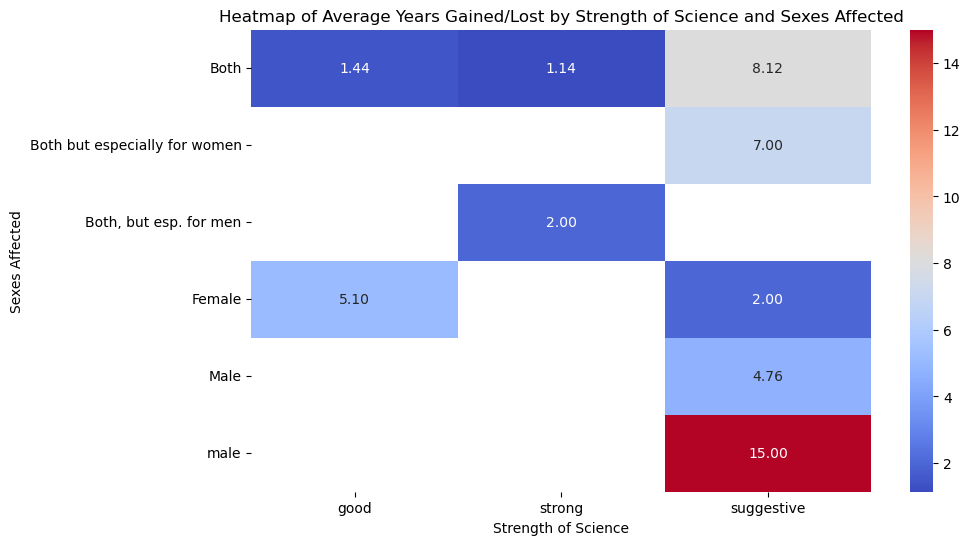

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for the heatmap
heatmap_data = positive_effect_data_sorted.pivot_table(
    values='Years gained / lost',
    index='sexes affected',
    columns='strength of science?',
    aggfunc='mean'
)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True, fmt='.2f')
plt.title('Heatmap of Average Years Gained/Lost by Strength of Science and Sexes Affected')
plt.xlabel('Strength of Science')
plt.ylabel('Sexes Affected')
plt.show()


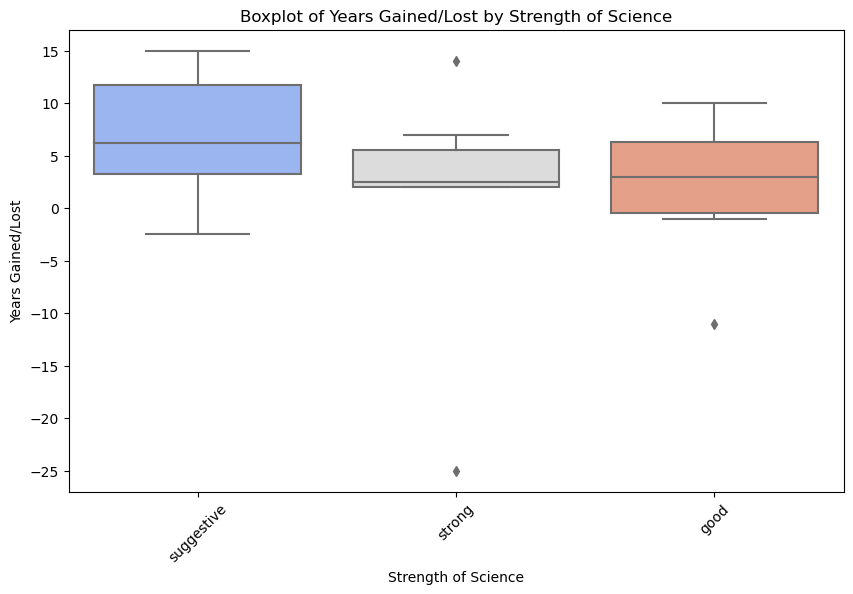

In [17]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='strength of science?', y='Years gained / lost', data=positive_effect_data_sorted, palette='coolwarm')
plt.title('Boxplot of Years Gained/Lost by Strength of Science')
plt.xlabel('Strength of Science')
plt.ylabel('Years Gained/Lost')
plt.xticks(rotation=45)
plt.show()


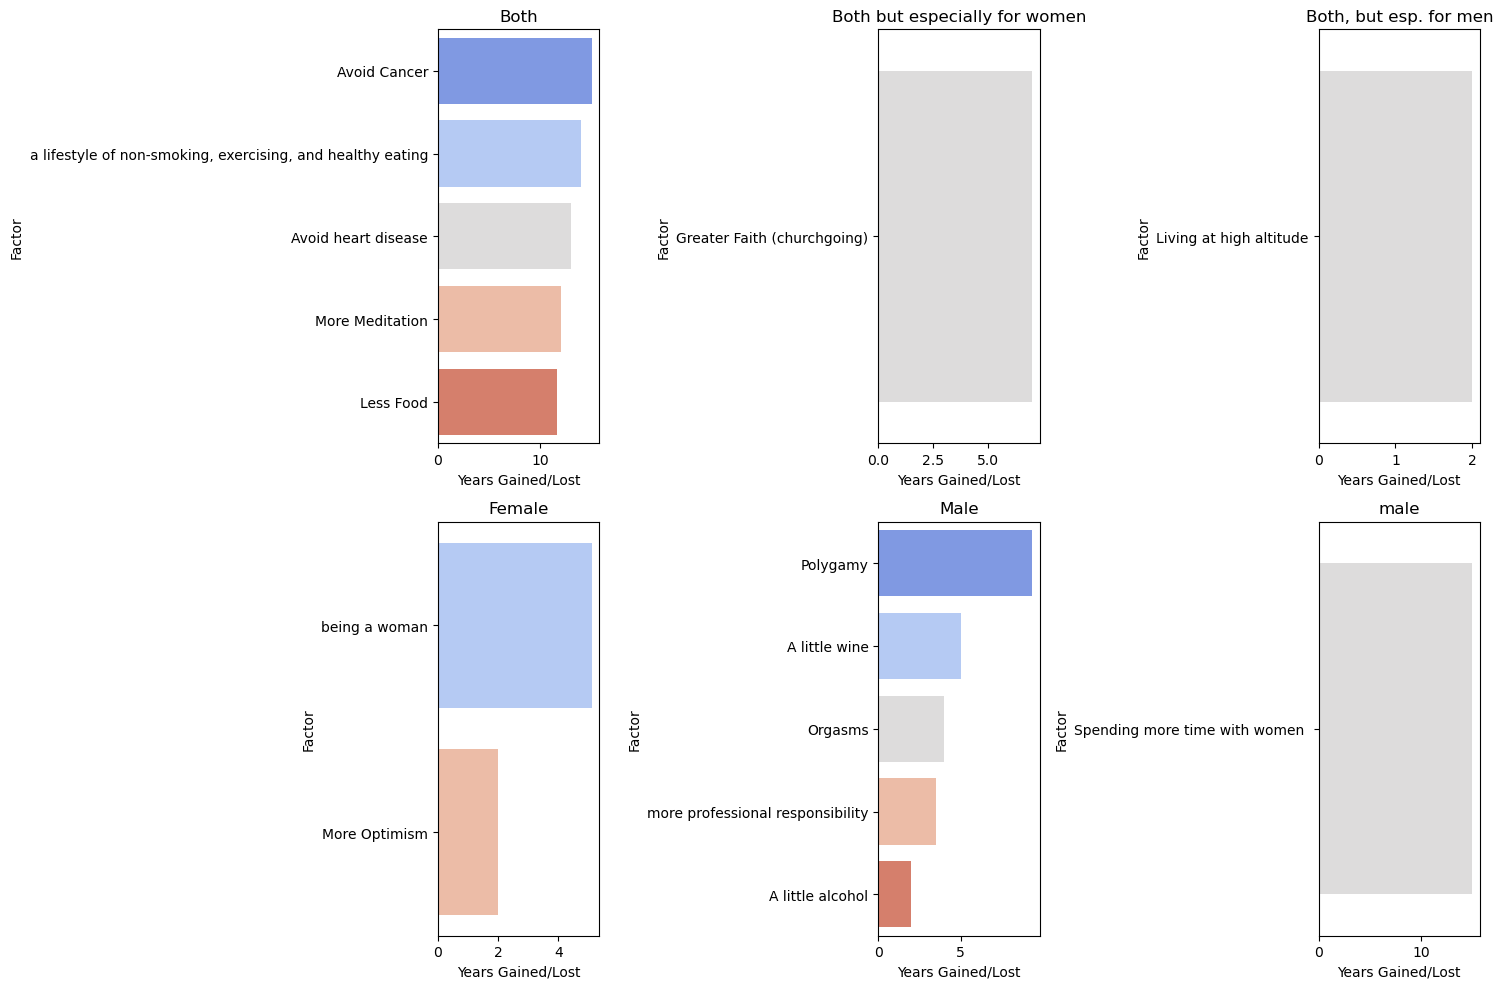

In [18]:
# Create a bar plot of the top 5 factors for each sex
top_factors_by_sex_grouped = top_factors_by_sex.groupby('sexes affected')

# Create subplots for each sex
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, (sex, group) in enumerate(top_factors_by_sex_grouped):
    ax = axes.flatten()[i]
    sns.barplot(x='Years gained / lost', y='Factor', data=group, ax=ax, palette='coolwarm')
    ax.set_title(sex)
    ax.set_xlabel('Years Gained/Lost')
    ax.set_ylabel('Factor')

plt.tight_layout()
plt.show()


**bar plot shows the top 5 factors that increase lifespan for each sex.**

* For both sexes, avoiding cancer and heart disease, as well as a lifestyle of non-smoking, exercising, and healthy eating, are the most impactful factors.
* For females, being a woman and having more optimism are also important factors.
* For males, spending more time with women, polygamy, and a little wine are among the top factors.

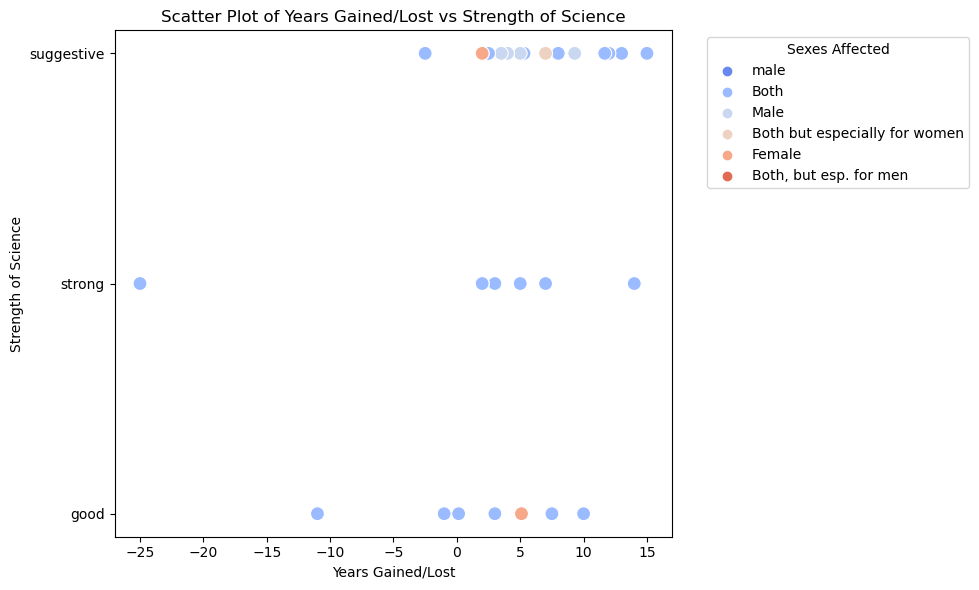

In [19]:
# Create a scatter plot of years gained or lost vs strength of science
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years gained / lost', y='strength of science?', data=positive_effect_data_sorted, hue='sexes affected', palette='coolwarm', s=100)
plt.title('Scatter Plot of Years Gained/Lost vs Strength of Science')
plt.xlabel('Years Gained/Lost')
plt.ylabel('Strength of Science')
plt.legend(title='Sexes Affected', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**The scatter plot shows the relationship between the years gained or lost and the strength of science.**

* Factors with strong scientific evidence tend to have a consistent positive impact on lifespan across all sexes.
* Factors with good scientific evidence also have a significant positive impact, especially for both sexes and females.
* Factors with suggestive evidence have a wide range of impact on lifespan, with some factors having a much higher impact than others.

/tmp/ipykernel_21/3584704408.py:6: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



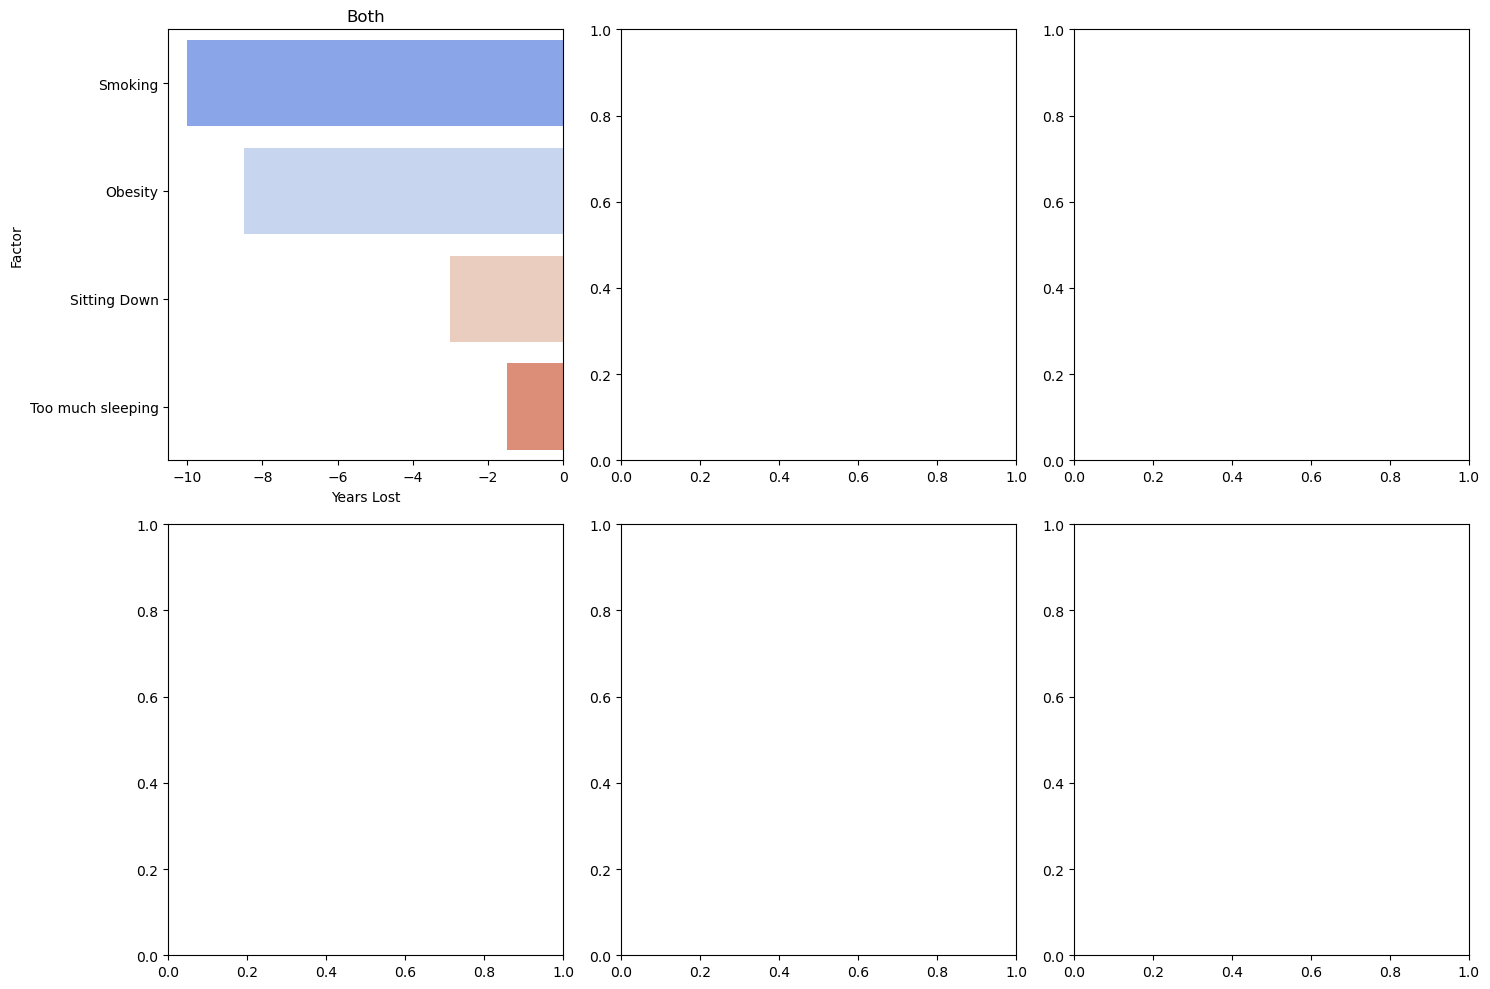

In [20]:
# Data Preprocessing for negative factors
negative_effect_data = data[data['effect'] == 'negative']
negative_effect_data_sorted = negative_effect_data.sort_values(by='Years gained / lost')

# Analyze the top factors that decrease lifespan for each sex
top_negative_factors_by_sex = negative_effect_data_sorted.groupby('sexes affected').apply(lambda x: x.nsmallest(5, 'Years gained / lost')).reset_index(drop=True)

# Create a bar plot of the top 5 factors that decrease lifespan for each sex
top_negative_factors_by_sex_grouped = top_negative_factors_by_sex.groupby('sexes affected')

# Create subplots for each sex
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, (sex, group) in enumerate(top_negative_factors_by_sex_grouped):
    ax = axes.flatten()[i]
    sns.barplot(x='Years gained / lost', y='Factor', data=group, ax=ax, palette='coolwarm')
    ax.set_title(sex)
    ax.set_xlabel('Years Lost')
    ax.set_ylabel('Factor')

plt.tight_layout()
plt.show()


**The bar plot shows the top 5 factors that decrease lifespan for each sex.**

* For both sexes, smoking, being overweight, and excessive drinking are the most impactful negative factors.
* For females, being a housewife and having more children are also significant negative factors.
* For males, being single, having a pessimistic outlook, and being a workaholic are among the top negative factors.

In [21]:
# Pie chart of distribution of factors that decrease lifespan by strength of science
negative_factors_strength_of_science = negative_effect_data_sorted['strength of science?'].value_counts()

fig = px.pie(
    values=negative_factors_strength_of_science.values, 
    names=negative_factors_strength_of_science.index,
    title='Distribution of Factors that Decrease Lifespan by Strength of Science',
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig.update_traces(textinfo='percent+label')
fig.update_layout(template='plotly_dark')
fig.show()


**Conclusion**

* The analysis and visualizations show that lifestyle choices such as non-smoking, exercising, healthy eating, meditation, and spending time with loved ones can significantly increase lifespan. Additionally, avoiding cancer and heart disease, having a good marriage, and living in the countryside also contribute to a longer life.

* On the other hand, smoking, being overweight, excessive drinking, being single, having a pessimistic outlook, and being a workaholic are among the top factors that decrease lifespan.

* Public health campaigns to promote healthy living, regular exercise, and meditation, as well as programs to support mental health and healthy relationships, can help increase lifespan. Additionally, initiatives to reduce pollution and encourage living in less populated areas, and public health campaigns to raise awareness about the risks of cancer and heart disease and promote regular health checks, can also contribute to a longer life.